## Coding Etiquette & Excel Reporting

## Table of contents                    


[00. Importing Libraries](#00.-Importing-Libraries)

[01. Importing Data](#01.-Importing-Data)

[02. Address security implications of dataset](#02.-Address-security-implications-of-dataset)

[03. Create a regional segmentation of the data by creating a “Region” column based on the “State” column from customers data set.](#03.-Create-a-regional-segmentation-of-the-data-by-creating-a-“Region”-column-based-on-the-“State”-column-from-customers-data-set.)


[04.a Create an exclusion flag for low-activity customers(with less than 5 orders)](#04.a-Create-an-exclusion-flag-for-low-activity-customers(with-less-than-5-orders))


[04.b Export sample](#04.b-Export-sample)


[05. Create variables for profiling customers](#05.-Create-variables-for-profiling-customers)


[05.a Create a profiling variable based on age](#05.a-Create-a-profiling-variable-based-on-age)

[05.b Create an income variable](#05.b-Create-an-income-variable)

[05.c Create a variable for number of dependants](#05.c-Create-a-variable-for-number-of-dependants)

[06. Create an appropriate visualization to show the distribution of profiles](#06.-Create-an-appropriate-visualization-to-show-the-distribution-of-profiles)


[06.a Age group in the user sample](#06.a-Age-group-in-the-user-sample)


[06.b Income_groups in the user sample](#06.b-Income_groups-in-the-user-sample)


[06.c Dependant status in the user sample](#06.c-Dependant-status-in-the-user-sample)


[07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.](#07.-Aggregate-the-max,-mean,-and-min-variables-on-a-customer-profile-level-for-usage-frequency-and-expenditure.)


[07.a Aggregating by age_group](#07.a-Aggregating-by-age_group)


[07.b Aggregating by income_group](#07.b-Aggregating-by-income_group)


[07.c Aggregating by dependants](#07.c-Aggregating-by-dependants)


[08. Is there any link between customer profiles within regions and departments?](#08.-Is-there-any-link-between-customer-profiles-within-regions-and-departments?)


[08.1.1 Customers income by region](#08.1.1-Customers-income-by-region)


[08.1.2 Age groups by Region](#08.1.2-Age-groups-by-Region)   


[08.1.3 Department group by Region](#08.1.3-Department-group-by-Region)


[08.1.4 Dependants by region](#08.1.4-Dependants-by-region)


[08.1.5 Price range by region](#08.1.5-Price-range-by-region)


[08.2.0 Creating profiles by department sales](#08.2.0-Creating-profiles-by-department-sales)


[08.2.1 Profile of department sales by age groups](#08.2.1-Profile-of-department-sales-by-age-groups)


[08.2.2 Profile of department sales by income group](#08.2.2-Profile-of-department-sales-by-income-group)


[08.2.3 Profile of department sales by region](#08.2.3-Profile-of-department-sales-by-region)


[09. Additional analyses](#09.-Additional-analyses)


[09.1 Top 10 departments for Instacart](#09.1-Top-10-departments-for-Instacart)


[09.2 Ordering trends based on loyalty status](#09.2-Ordering-trends-based-on-loyalty-status)


[09.3 Total orders by region](#09.3-Total-orders-by-region)


[09.4 Average order total per region](#09.4-Average-order-total-per-region)


[09.5 Difference in ordering habits of different customer profiles](#09.5-Difference-in-ordering-habits-of-different-customer-profiles)


[09.6 Product Prices and Pricing Categories](#09.6-Product-Prices-and-Pricing-Categories)


[09.7 customer loyalty Comparison](#09.7-customer-loyalty-Comparison)


[09.8 customer marital status breakdown](#09.8-customer-marital-status-breakdown)


[09.9 age by num_of_dependants comparison](#09.9-age-by-num_of_dependants-comparison)


[09.10 age_group By customer frequency Comparison](#09.10-age_group-By-customer-frequency-Comparison)


[09.11 age_group By customer loyalty](#09.11-age_group-By-customer-loyalty)


[09.12 Loyalty spending By type of spender](#09.12-Loyalty-spending-By-type-of-spender)

## 00. Importing Libraries

In [185]:
## Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
# import scipy
pd.options.display.max_columns = None

## 01. Importing Data

In [2]:
## The main folder path
path= r'E:\Careerfoundry course\Achievement 4 , Python\12.06.2024 Instacart Basket Analysis'

# Import dataset orders_products_merged.pkl
df_cust = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))


###################################################################################################################################################

In [3]:
df_cust.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [4]:
df_cust.shape

(206209, 10)

## 01. Import the data set

In [5]:
instacart_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_merged.pkl'))
# The old name was 'custs_ords_prods_merged.pkl'

In [8]:
instacart_merged.shape

(32404859, 34)

In [9]:
instacart_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Mid-range product,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender,7.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,7.0,10,0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


## 02. Address security implications of dataset

In [ ]:
## Drop first name and last name columns to avoid PII
instacart_merged.drop(['first_name', 'surname'], axis = 1, inplace = True)

In [12]:
instacart_merged.shape

(32404859, 32)

In [13]:
instacart_merged.head(1)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both


## 03. Create a regional segmentation of the data by creating a “Region” column based on the “State” column from customers data set.

In [14]:
## Northeast region by state
northeast_region = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont' ]

In [15]:
## Midwest region by state
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [16]:
## South region by state
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [17]:
##  West region by state
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [18]:
## Create a column "region" using the regions created above
instacart_merged.loc[instacart_merged['state'].isin(northeast_region), 'region'] = 'northeast'

In [19]:
instacart_merged.loc[instacart_merged['state'].isin(midwest_region), 'region'] = 'midwest'

In [20]:
instacart_merged.loc[instacart_merged['state'].isin(south_region), 'region'] = 'south'

In [21]:
instacart_merged.loc[instacart_merged['state'].isin(west_region), 'region'] = 'west'

In [22]:
## check the length of the new column
len(instacart_merged['region'])

32404859

In [23]:
## check the values of the new column "region"
instacart_merged['region'].value_counts(dropna = False)

region
south        10791885
west          8292913
midwest       7597325
northeast     5722736
Name: count, dtype: int64

In [24]:
## check the total of the values of the new column "region"
instacart_merged['region'].value_counts(dropna = False).sum()

32404859

In [25]:
## Determine if there is a difference in spending habits between different regions
region_spending_crosstab = pd.crosstab(instacart_merged['region'], instacart_merged['spending_flag'], dropna = False)

In [26]:
## View the cross table
region_spending_crosstab

spending_flag,High spender,Low spender
region,,
midwest,29265,7568060
northeast,18642,5704094
south,40579,10751306
west,31242,8261671


##### Comment: we can see that the south regiom has the highest mumber of costumers of high spender and also of low spender followed by the west region. 
##### I think the only reason is that south region has the highest population followed by the west region. So, we can not say that spending habits differ between regions.

## 04.a Create an exclusion flag for low-activity customers(with less than 5 orders)

In [27]:
## Create "exclusion_flag" column and create a flag to exclude users with fewer than 5 orders
instacart_merged.loc[instacart_merged['max_order'] < 5, 'exclusion_flag'] = 'exclude'

In [28]:
# Create a flag to keep users with orders >= 5 orders
instacart_merged.loc[instacart_merged['max_order'] >= 5, 'exclusion_flag'] = 'include'

In [29]:
instacart_merged.shape

(32404859, 34)

In [30]:
instacart_merged.head(2)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include


In [31]:
## check frequency counts of the new column
instacart_merged['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
include    30964564
exclude     1440295
Name: count, dtype: int64

In [32]:
## check the total counts of the new column
instacart_merged['exclusion_flag'].value_counts(dropna = False).sum()

32404859

In [33]:
# Create a crosstab to validate the data in Excel
exclusion_flag_check = pd.crosstab(instacart_merged['exclusion_flag'], instacart_merged['max_order'], dropna = False)

In [34]:
exclusion_flag_check

max_order,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
exclusion_flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
exclude,5,6,686741,753543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
include,0,0,0,0,793140,811396,803979,811843,810213,773124,769579,744454,736359,733970,696131,655604,661981,621638,613711,595323,580515,593612,534271,529905,521960,503273,487635,460949,458788,458746,449436,424493,413854,418067,366236,398947,374638,347901,357489,367311,347926,331569,337202,334794,316758,317294,329459,292467,300430,334358,285693,285211,285458,240131,227599,237279,200635,192981,188261,192055,174191,164176,159384,161095,154757,133933,132211,126181,111866,103916,122030,100161,117901,115302,99783,87990,96402,93331,87757,80818,82377,65905,79238,82661,75167,64117,69720,65710,71488,48328,59378,55127,50333,52600,59877,40453,44949,44587,1171333


In [90]:
# Copy the crosstab data to the clipboard to be able to paste in Excel
exclusion_flag_check.to_clipboard()

##### Verified in Excel that all rows with fewer than 5 orders have been marked as exclude and all rows with orders 5 or more have been marked as include.

In [35]:
# Create a sample of the dataframe removing the excluded rows
instacart_merged_sample = instacart_merged[instacart_merged['exclusion_flag'] == 'include']

In [36]:
# Validate the updated dataframe sample
instacart_merged_sample.shape

(30964564, 34)

In [37]:
instacart_merged_sample.head(1)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include


##### The number of rows in the instacart dataframe sample equals the number of rows marked as include during prior validation steps. The instacart dataframe now inludes the requested data of customers who have made 5 or more orders with Instacart.

## 04.b Export sample

In [38]:
instacart_merged_sample.dtypes

product_id                      object
product_name                    object
aisle_id                        object
department_id                   object
prices                         float64
order_id                        object
user_id                         object
order_number                     int64
orders_day_of_week               int64
order_hour_of_day                int64
days_since_prior_order         float64
add_to_cart_order                int64
reordered                        int64
price_range                     object
price_range_loc                 object
busiest_day                     object
busiest_days                    object
busiest_period_of_day           object
max_order                        int64
loyalty_flag                    object
mean_product_price             float64
spending_flag                   object
median_days_between_orders     float64
order_frequency                 object
gender                          object
state                    

In [39]:
instacart_merged_sample.shape

(30964564, 34)

In [101]:
## Export Sample
instacart_merged_sample.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_merged_sample.pkl'))

## 05. Create variables for profiling customers

## 05.a Create a profiling variable based on age

In [40]:
instacart_merged.head(1)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include


In [41]:
## Create a young_adult range for ages less than or equal to 25 years old
instacart_merged.loc[instacart_merged['age']<=25, 'age_group']='young_adult'

In [42]:
#@ Create a adult range for ages between 25 and 45 years old
instacart_merged.loc[(instacart_merged['age']>25)&(instacart_merged['age']<45), 'age_group']='adult'

In [43]:
## Create an older_adult range for ages between 45 and 65 years old
instacart_merged.loc[(instacart_merged['age']>=45)&(instacart_merged['age']<65), 'age_group']='older_adult'

In [44]:
## Create a senior range for ages greater than 65 years old
instacart_merged.loc[instacart_merged['age']>=65, 'age_group']='senior'

In [45]:
instacart_merged.head(1)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag,age_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include,senior


In [46]:
## Validate the age ranges were created successfully and the frequency counts of each
instacart_merged['age_group'].value_counts(dropna = False)

age_group
older_adult    10139691
adult           9644895
senior          8575084
young_adult     4045189
Name: count, dtype: int64

In [49]:
## Validate the age ranges were created successfully and the frequency counts of each
instacart_merged['age_group'].value_counts(dropna = False).sum()

32404859

In [48]:
instacart_merged.dropna()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag,age_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include,senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include,senior
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Mid-range product,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender,7.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both,northeast,include,senior
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,7.0,10,0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both,midwest,exclude,adult
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both,midwest,exclude,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,49688,Fresh Foaming Cleanser,73,11,13.5,1788356,200215,2,0,9,5.0,27,0,Mid-range product,Mid-range product,Busiest day,Busiest days,Most orders,6,New customer,8.220313,Low spender,7.0,Frequent customer,Female,Rhode Island,47,9/13/2017,1,married,166687,both,northeast,include,older_adult
32404855,49688,Fresh Foaming Cleanser,73,11,13.5,3401313,200377,1,4,11,7.0,5,0,Mid-range product,Mid-range product,Least busy,Slowest days,Most orders,4,New customer,7.364516,Low spender,30.0,Non-frequent customer,Male,West Virginia,25,3/16/2020,0,single,53936,both,south,exclude,young_adult
32404856,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,5,3,8,15.0,12,0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,20,Regular customer,8.500344,Low spender,6.0,Frequent customer,Female,Michigan,57,3/21/2018,1,married,100649,both,midwest,include,older_adult
32404857,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,9,3,15,5.0,11,1,Mid-range product,Mid-range product,Regularly busy,Slowest days,Most orders,20,Regular customer,8.500344,Low spender,6.0,Frequent customer,Female,Michigan,57,3/21/2018,1,married,100649,both,midwest,include,older_adult


In [50]:
instacart_merged.shape

(32404859, 35)

In [51]:
## Aggregate age group expenditure
instacart_merged.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
adult        7.790142  1.0  25.0
older_adult  7.789202  1.0  25.0
senior       7.796546  1.0  25.0
young_adult  7.785748  1.0  25.0

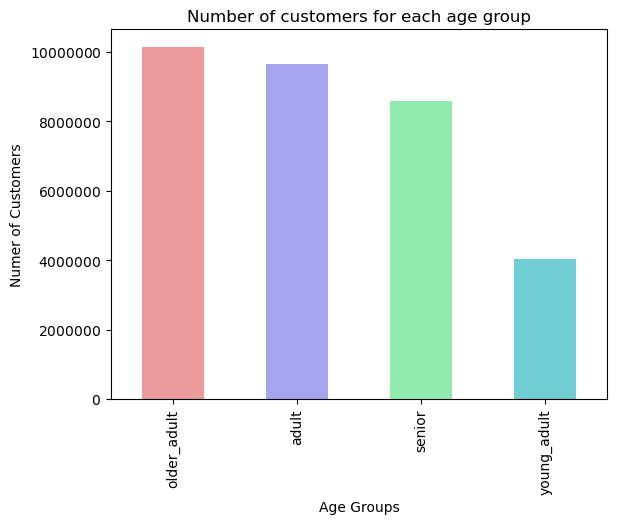

In [72]:
## Create bar chart for age groups
bar=instacart_merged['age_group'].value_counts().plot.bar(color =['#ed9a9d', '#a4a5ed', '#91ebaf','#70cdd4'])
bar.set_title('Number of customers for each age group')
bar.set_ylabel('Numer of Customers')
bar.set_xlabel('Age Groups')
bar.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
bar.ticklabel_format(style='plain', axis='y')

In [64]:
## Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_agegroup.png'), bbox_inches='tight')

## 05.b Create an income variable

In [65]:
## Create a new column called income_group and create a range called low for values less than or equal to 50,000
instacart_merged.loc[instacart_merged['income'] <= 50000, 'income_group'] = 'low'

In [66]:
## Create a range called middle consisting of values between 50,000 and 100,000
instacart_merged.loc[(instacart_merged['income'] > 50000) & (instacart_merged['income'] <= 100000), 'income_group'] = 'middle'

In [67]:
## Create a range called high for all values greater than 100,000
instacart_merged.loc[instacart_merged['income'] > 100000, 'income_group'] = 'high'

In [68]:
instacart_merged.head(1)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag,age_group,income_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include,senior,low


In [69]:
## Validate frequency counts of new column and ensure there are no missing values
instacart_merged['income_group'].value_counts(dropna = False)

income_group
high      14814202
middle    13996574
low        3594083
Name: count, dtype: int64

In [70]:
instacart_merged.head(2)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag,age_group,income_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include,senior,low
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include,senior,low


In [71]:
## Aggregate income_group by expenditure
instacart_merged.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                  mean  min   max
income_group                     
high          7.959257  1.0  25.0
low           6.696985  1.0  25.0
middle        7.893885  1.0  25.0

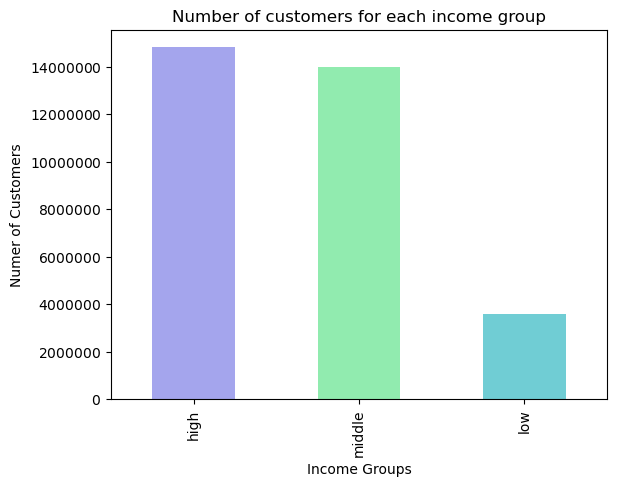

In [81]:
## Create a bar chart for income_group visualization
bar2 = instacart_merged['income_group'].value_counts().plot.bar(color =['#a4a5ed', '#91ebaf','#70cdd4'])
#bar2 = instacart_merged['income_group'].value_counts().sort_values().plot.barh(color =['#a4a5ed', '#91ebaf','#70cdd4']) # Horizontal and sort.
bar2.set_title('Number of customers for each income group')
bar2.set_ylabel('Numer of Customers')
bar2.set_xlabel('Income Groups')
bar2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
bar2.ticklabel_format(style='plain', axis='y')

In [83]:
## Export Bar Chart
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_incomegroup.png'), bbox_inches='tight')

## 05.c Create a variable for number of dependants

In [84]:
## Create a flag to identify which users have dependants
instacart_merged.loc[instacart_merged['n_dependants'] > 0, 'dependants_flag'] = 'has_dependants'

In [85]:
## Create a flag to identify which users have no dependants
instacart_merged.loc[instacart_merged['n_dependants'] == 0, 'dependants_flag'] = 'no_dependants'

In [86]:
instacart_merged.head(1)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag,age_group,income_group,dependants_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include,senior,low,has_dependants


In [87]:
## Validate flag was created successsfully and count frequency
instacart_merged['dependants_flag'].value_counts(dropna = False).sum()

32404859

In [75]:
## Aggregate dependant_flag frequency
#instacart_merged.groupby('dependants_flag').agg({'days_since_last_order': ['mean', 'min', 'max']})

In [88]:
## Aggregate for dependant_flag expenditure
instacart_merged.groupby('dependants_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
dependants_flag                     
has_dependants   7.791334  1.0  25.0
no_dependants    7.789975  1.0  25.0

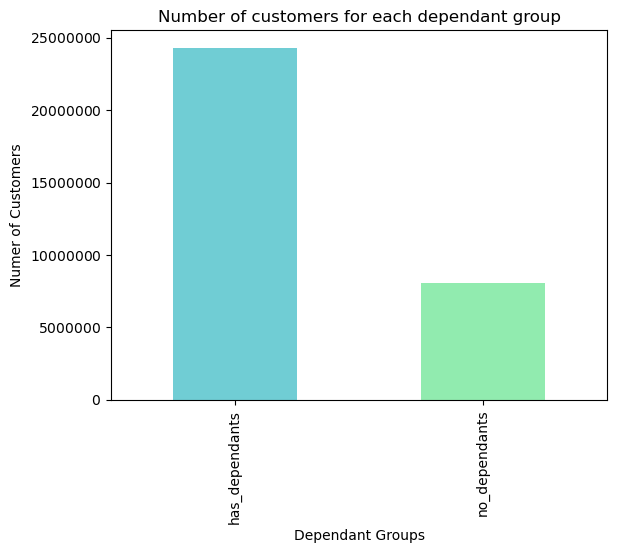

In [93]:
## Create visualization for number of dependent group profile
bar3 = instacart_merged['dependants_flag'].value_counts().plot.bar(color = ['#70cdd4', '#91ebaf'])
bar3.set_title('Number of customers for each dependant group')
bar3.set_ylabel('Numer of Customers')
bar3.set_xlabel('Dependant Groups')
bar3.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
bar3.ticklabel_format(style='plain', axis='y')

In [94]:
## Export dependant group Bar Chart
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependentgroup.png'), bbox_inches='tight')

## 06. Create an appropriate visualization to show the distribution of profiles

In [95]:
## Create a sample of data with user_id, age_group, income_group, dependants_flag, and loyalty_flag columns
user_sample = instacart_merged[['user_id', 'age_group', 'income_group', 'dependants_flag', 'region', 'loyalty_flag']]

In [96]:
user_sample.shape

(32404859, 6)

In [97]:
(user_sample.drop_duplicates()).shape

(206209, 6)

In [98]:
print(user_sample.duplicated().sum())

32198650


In [99]:
# Drop duplicate rows in our sample to obtain unique customers
user_sample = user_sample.drop_duplicates()

In [100]:
user_sample.shape

(206209, 6)

In [101]:
# check the data sample
user_sample

,user_id,age_group,income_group,dependants_flag,region,loyalty_flag
0,138,senior,low,has_dependants,midwest,Regular customer
2,709,senior,high,has_dependants,northeast,New customer
3,764,adult,low,has_dependants,midwest,New customer
5,777,older_adult,middle,has_dependants,west,Regular customer
6,825,young_adult,low,has_dependants,south,New customer
...,...,...,...,...,...,...
31936172,136325,older_adult,middle,has_dependants,west,New customer
32043791,27382,senior,low,has_dependants,northeast,New customer
32053874,56454,young_adult,low,has_dependants,west,New customer
32062880,80734,older_adult,low,has_dependants,south,New customer


## 06.a Age group in the user sample

In [102]:
## Create age_group counts table
age_group_counts = user_sample['age_group'].value_counts()

In [103]:
age_group_counts

age_group
older_adult    64580
adult          61213
senior         54729
young_adult    25687
Name: count, dtype: int64

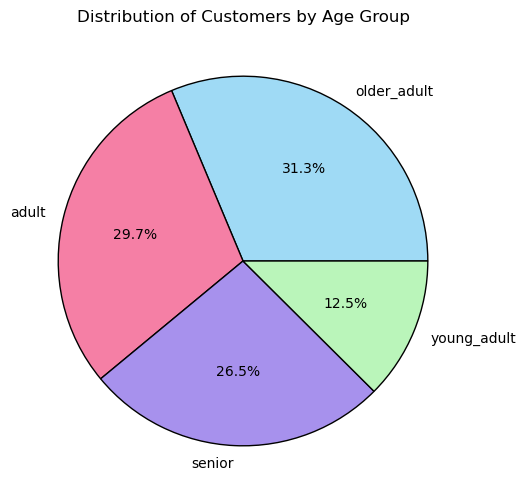

In [104]:
# Create a Pie Chart of the age_group column then save and export it to project folder
plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(age_group_counts, 
        labels = age_group_counts.index, 
        autopct='%.1f%%', # Show percentage to one decimal point
        colors = ['#9fdaf5', '#f57fa5', '#a791ed', '#baf5ba', '#edcf9a', '#dbd6af'], # Set colors using color palette
        wedgeprops = {'edgecolor' : 'black'}) # Set color of boarders
plt.title('Distribution of Customers by Age Group') # Set title of pie chart title
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_age_groups_pie.png'), bbox_inches = 'tight') # Save pie chart and export to project folder
plt.show()

## 06.b Income_groups in the user sample

In [105]:
## Create an income_group table
income_group_counts = user_sample['income_group'].value_counts()

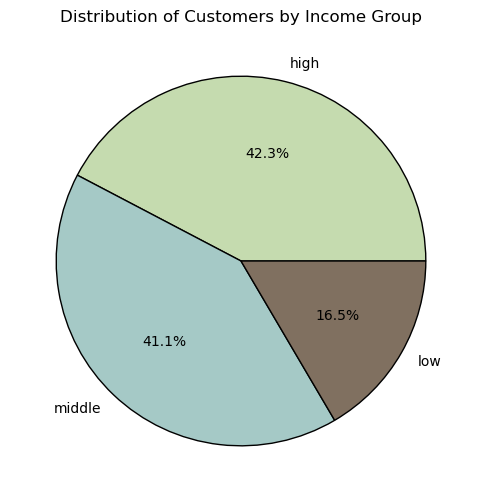

In [107]:
# Create a pie chart of income_groups, save and export it to project folder
plt.figure(figsize=(6, 6))           # Control size of chart
plt.pie(income_group_counts, 
        labels = income_group_counts.index, 
        autopct='%.1f%%',            # Show percentage to one decimal point
        colors = ['#c5dbaf', '#a5c9c6', '#807060'],   # Set colors using color palette
        wedgeprops = {'edgecolor' : 'black'})       # Set color of boarders
plt.title('Distribution of Customers by Income Group')      # Set title of pie chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_income_groups_pie.png'), bbox_inches = 'tight') # Save pie chart and export to project folder
plt.show()

## 06.c Dependant status in the user sample

In [108]:
# create a table of dependents_flag counts
dependants_flag_counts = user_sample['dependants_flag'].value_counts()

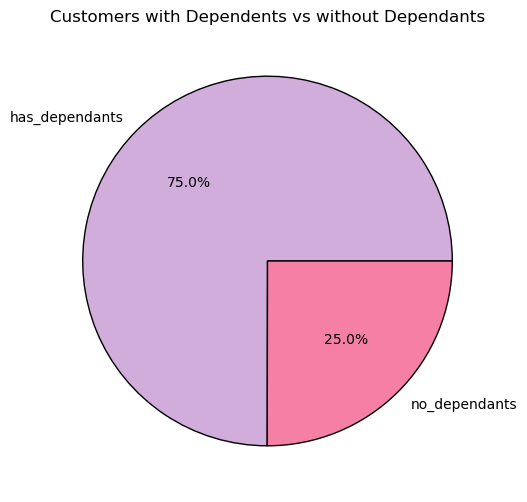

In [110]:
# Create a pie chart of dependant status, save and export to project folder
plt.figure(figsize=(6, 6))           # Set size of pie chart
plt.pie(dependants_flag_counts, 
        labels = dependants_flag_counts.index, 
        autopct='%.1f%%',         # Show percentage to one decimal point
        colors = ['#d0addb', '#f57fa5', '#a791ed'],       # Set colors using color palette
        wedgeprops = {'edgecolor' : 'black'})  # Set color of boarders of pie chart
plt.title('Customers with Dependents vs without Dependants')   # Set title of pie chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_dependants_pie.png'), bbox_inches = 'tight')  # Save and export pie chart
#plt.show()

## 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [111]:
## Create an aggregated subset of order data using sum of the prices column as the total cost of each order:
orders_subset = instacart_merged.groupby(['user_id', 'age_group', 'income_group', 'dependants_flag', 'loyalty_flag', 'region', 'order_number'])['prices'].sum().reset_index()

In [112]:
orders_subset.head(1)

,user_id,age_group,income_group,dependants_flag,loyalty_flag,region,order_number,prices
0,1,adult,low,has_dependants,New customer,south,1,31.6


In [113]:
## Rename the prices column to order_total to reflect the aggregation done in prior step
orders_subset.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [114]:
## check data subset and column renaming
orders_subset.head()

,user_id,age_group,income_group,dependants_flag,loyalty_flag,region,order_number,order_total
0,1,adult,low,has_dependants,New customer,south,1,31.6
1,1,adult,low,has_dependants,New customer,south,2,35.4
2,1,adult,low,has_dependants,New customer,south,3,28.2
3,1,adult,low,has_dependants,New customer,south,4,26.0
4,1,adult,low,has_dependants,New customer,south,5,57.0


## 07.a Aggregating by age_group

In [115]:
# Create a subset of data by age_group and calculate the max, min, and mean
age_cat_agg = orders_subset.groupby('age_group').agg({'order_total' : ['min', 'mean', 'max']})

In [116]:
# Validate age_group subset
age_cat_agg

order_total                   
                    min       mean     max
age_group                                 
adult               0.0  78.835630   829.2
older_adult         0.0  78.390481  1092.2
senior              0.0  78.244911   787.0
young_adult         0.0  78.704374   842.1

##### all age groups tend to spend the same amount per order on average.

## 07.b Aggregating by income_group

In [117]:
# Create a subset of data by income_group and calculate the max, min, and mean
income_cat_agg = orders_subset.groupby('income_group').agg({'order_total' : ['min', 'mean', 'max']})

In [118]:
income_cat_agg

order_total                   
                     min       mean     max
income_group                               
high                 0.0  83.816501  1092.2
low                  1.0  52.428993   875.0
middle               0.0  81.883711   852.5

##### Lower income customers on average tend to spend less then other income groups.

## 07.c Aggregating by dependants

In [119]:
# Create a subset of data by dependant_category and calculate the max, min, and mean
dependants_cat_agg = orders_subset.groupby('dependants_flag').agg({'order_total' : ['min', 'mean', 'max']})

In [120]:
dependants_cat_agg

order_total                   
                        min       mean     max
dependants_flag                               
has_dependants          0.0  78.588869  1092.2
no_dependants           0.0  78.325169   875.0

##### both customers whether they have dependent or not spend the same amount on average.

## 08. Is there any link between customer profiles within regions and departments?

## 08.1.1 Customers income by region

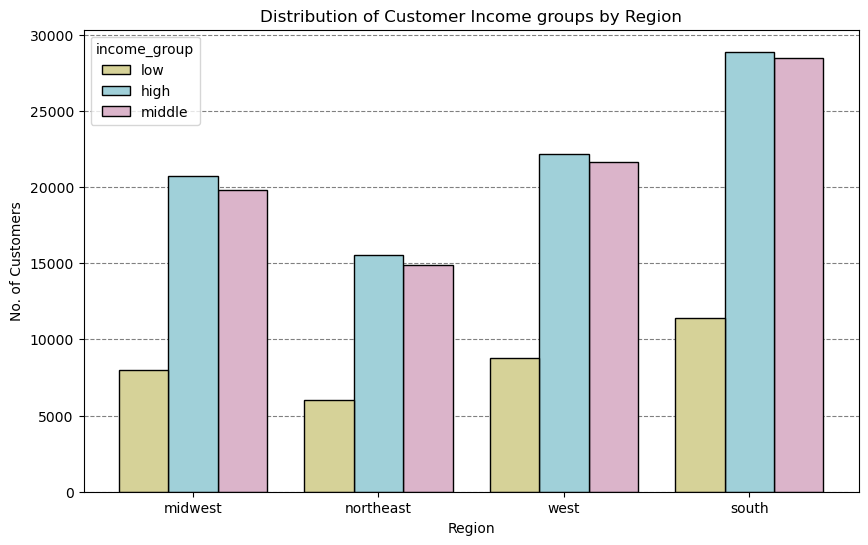

In [123]:
# Create a histogram to show the counts of customers in each income group by region
plt.figure(figsize=(10, 6))
sns.histplot(data=user_sample, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1, palette=['#d6d298', '#a0d0d9', '#dbb4ca'])
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.title('Distribution of Customer Income groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_income_by_region.png'), bbox_inches = 'tight')
plt.show()

In [124]:
# check data with a crosstab
pd.crosstab(user_sample['income_group'], user_sample['region'], dropna = False)

region,midwest,northeast,south,west
income_group,,,,
high,20714,15523,28877,22139
low,7985,5988,11372,8760
middle,19820,14877,28488,21666


## 08.1.2 Age groups by Region

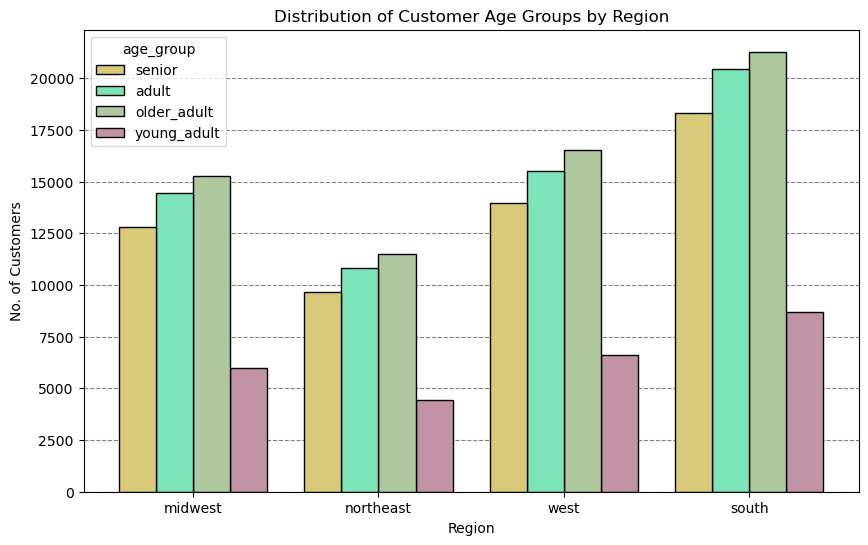

In [125]:
# Create a histogram showing counts of age_group by region
plt.figure(figsize=(10, 6))
sns.histplot(data=user_sample, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1, palette=['#d9ca79', '#7de3b8', '#aec79f', '#c293a4'])
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_age_by_region.png'), bbox_inches = 'tight') 
plt.show()

In [126]:
# check histogram using a crosstab
pd.crosstab(user_sample['age_group'], user_sample['region'], dropna = False)

region,midwest,northeast,south,west
age_group,,,,
adult,14443,10837,20442,15491
older_adult,15292,11487,21284,16517
senior,12820,9646,18306,13957
young_adult,5964,4418,8705,6600


## 08.1.3 Department group by Region

In order to perform any anlyses on departments or particular departments, we need to add the department into the combined ords_prods_custs dataframe.
We can do this by loading the departments_wrangled dataframe from an earlier exercise and converting it into a data dictionary. 
Then we can merge the dataframes on the department_id column.

In [127]:
# Import the departments_wrangled csv file into the notebook
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [147]:
# check the data was imported successfully
df_dept

,Unnamed: 0,index,department_id,department
0,0,1,1,frozen
1,1,2,2,other
2,2,3,3,bakery
3,3,4,4,produce
4,4,5,5,alcohol
5,5,6,6,international
6,6,7,7,beverages
7,7,8,8,pets
8,8,9,9,dry goods pasta
9,9,10,10,bulk


In [130]:
# check the data was imported successfully
instacart_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag,age_group,income_group,dependants_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include,senior,low,has_dependants
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include,senior,low,has_dependants
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Mid-range product,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender,7.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both,northeast,include,senior,high,has_dependants
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,7.0,10,0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both,midwest,exclude,adult,low,has_dependants
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both,midwest,exclude,adult,low,has_dependants


In [131]:
# Remove the '_merge' column because we will generate another one:
instacart_merged = instacart_merged.loc[:, instacart_merged.columns != '_merge']

In [132]:
instacart_merged.head(1)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag,age_group,income_group,dependants_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,midwest,include,senior,low,has_dependants


In [133]:
# Keep only 'department_id' and 'department':
df_dep = df_dept.loc[:, ['department_id', 'department']]

In [134]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [135]:
instacart_merged.shape

(32404859, 36)

In [136]:
df_dep.dtypes

department_id     int64
department       object
dtype: object

In [137]:
# Convert the department_id of df_dep to string:
df_dep['department_id'] = df_dep['department_id'].astype('str')

In [138]:
df_dep.dtypes

department_id    object
department       object
dtype: object

In [139]:
## Merge the two dataframes using the column 'user_id' as the shared column with the default join (inner)
instacart_merged_dep = instacart_merged.merge(df_dep, on = 'department_id', indicator = True)

In [140]:
instacart_merged_dep.shape

(32404859, 38)

In [148]:
instacart_merged_dep.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag,age_group,income_group,dependants_flag,department,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,midwest,include,senior,low,has_dependants,snacks,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,midwest,include,senior,low,has_dependants,snacks,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Mid-range product,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender,7.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,northeast,include,senior,high,has_dependants,snacks,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,7.0,10,0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,midwest,exclude,adult,low,has_dependants,snacks,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,midwest,exclude,adult,low,has_dependants,snacks,both


In [142]:
# Create a crosstab containing the department and region
region_dep = pd.crosstab(instacart_merged_dep['department'], instacart_merged_dep['region'], dropna = False)

In [143]:
# Validate the crosstab
region_dep

region,midwest,northeast,south,west
department,,,,
alcohol,36186,26542,51624,39344
babies,98983,75139,143654,106026
bakery,273869,208599,388815,301145
beverages,625574,483418,898940,680191
breakfast,163551,123574,234251,181657
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1264223,954026,1796969,1383529
deli,245678,186817,349419,269335


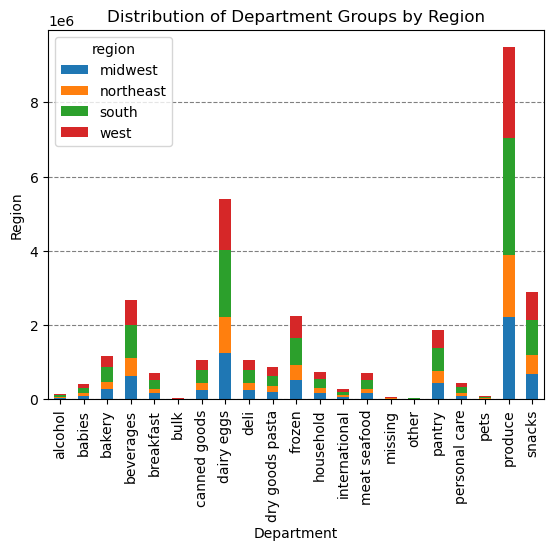

In [144]:
# Create a bar chart using region and department
bar4 = region_dep.plot(kind='bar', stacked =True)
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.title('Distribution of Department Groups by Region')
plt.ylabel('Region')
plt.xlabel('Department')
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_department.png'),bbox_inches='tight') # Save and export the bar chart

## 08.1.4 Dependants by region

In [145]:
# Import 'instacart_merged_sample':
instacart_merged_sample.head(1)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest,include


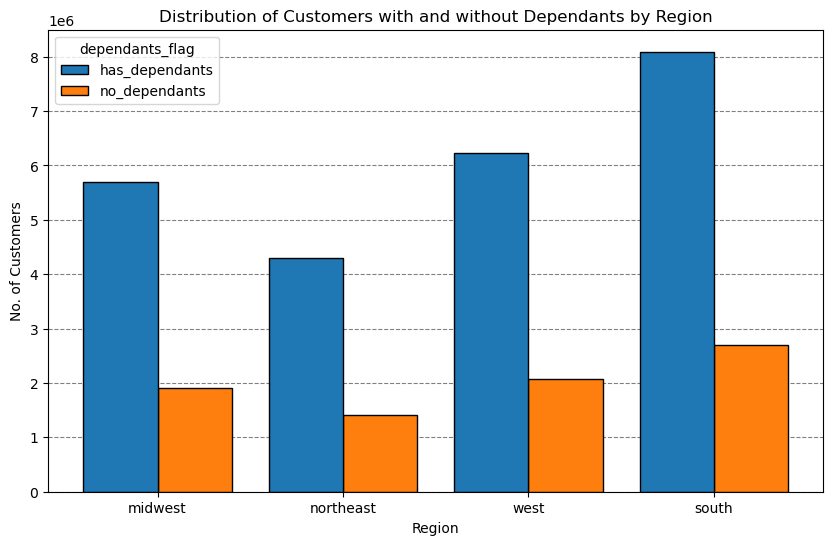

In [149]:
# Create a histogram using the dependants_flag and region columns
plt.figure(figsize=(10, 6))
sns.histplot(data = instacart_merged, x='region', hue='dependants_flag', multiple='dodge', shrink=.8, alpha=1)
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.title('Distribution of Customers with and without Dependants by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_dependants_by_region.png'), bbox_inches = 'tight')
plt.show()

## 08.1.5 Price range by region

In [150]:
# Create a crosstab containing region and price range
region_pricerange = pd.crosstab(instacart_merged['region'], instacart_merged['price_range_loc'], dropna = False)

In [151]:
# check the crosstab
region_pricerange

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
midwest,97918,2372304,5127103
northeast,73202,1792943,3856591
south,139390,3368338,7284157
west,107168,2592736,5593009


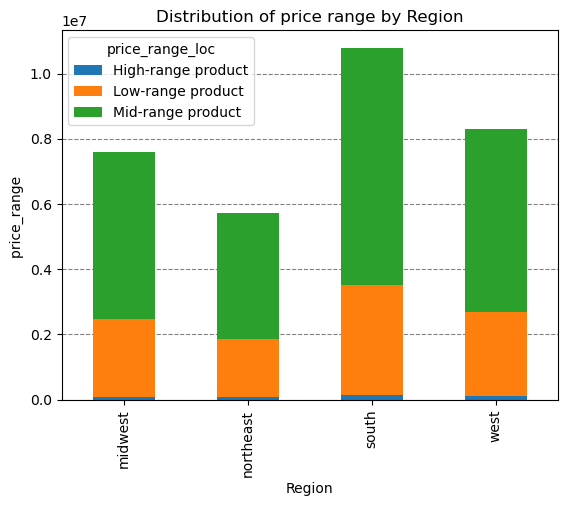

In [152]:
# Create a bar chart using the region_pricerange data
bar6 = region_pricerange.plot(kind='bar', stacked =True)
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='gray', linestyle='dashed')
plt.title('Distribution of price range by Region')
plt.ylabel('price_range ')
plt.xlabel('Region')
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_pricerange.png'), bbox_inches='tight')

## 08.2.0 Creating profiles by department sales

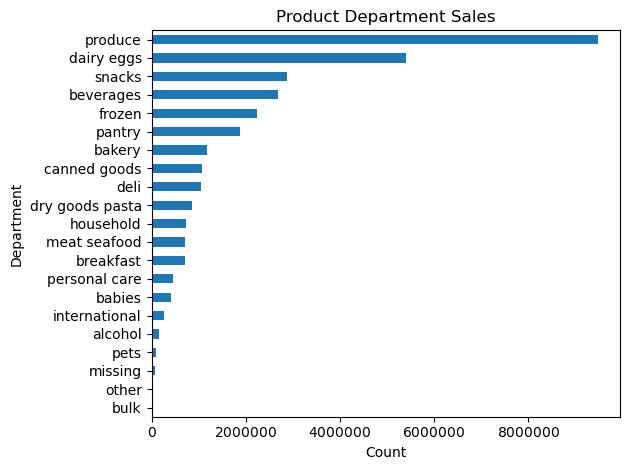

In [166]:
# Creating department sales bar chart
dept_bar=instacart_merged_dep['department'].value_counts().sort_values(ascending=True).plot.barh()
# dept_bar=instacart_merged_dep['department'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Department')
dept_bar.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
dept_bar.ticklabel_format(style='plain', axis='x')
plt.tight_layout()

In [168]:
# Exporting Department Bar Chart
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_product_bar.png'))

## 08.2.1 Profile of department sales by age groups

In [169]:
# Create a crosstab to compare age_group profile with departments
age_department_comparison=pd.crosstab(instacart_merged_dep['age_group'],instacart_merged_dep['department'],dropna=False)

<Figure size 2500x2500 with 0 Axes>

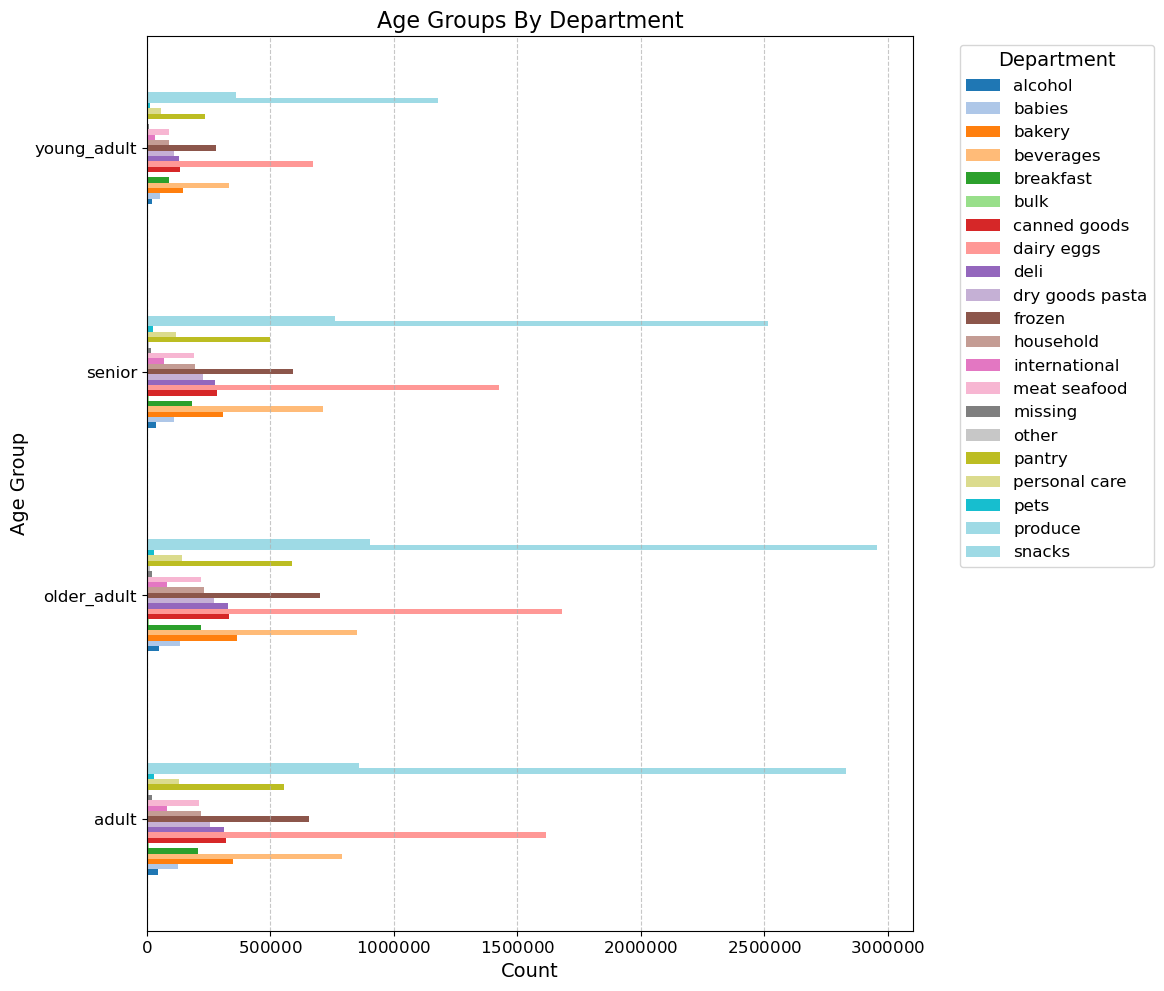

In [177]:
plt.figure(figsize=(25, 25))
age_department_comparison_bar = age_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Age Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

age_department_comparison_bar.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
age_department_comparison_bar.ticklabel_format(style='plain', axis='x')

plt.show()

In [178]:
# Exporting Age Group by Department Bar Chart
age_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_department_comparison_bar.png'))

## 08.2.2 Profile of department sales by income group

In [172]:
# Creating crosstab to compare income_group profile with departments
income_group_department_comparison=pd.crosstab(instacart_merged_dep['income_group'],instacart_merged_dep['department'],dropna=False)

In [173]:
income_group_department_comparison

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
high,72729,202331,549512,1173420,310630,14691,509557,2501987,482103,411995,1035820,335774,125774,351525,31248,16555,879995,203222,47052,4410706,1147576
low,19808,30858,114709,405505,97368,4889,86652,535079,114096,70641,233490,94179,23441,37065,7240,4183,179432,51755,9312,882102,592279
middle,61159,190613,508207,1109198,295035,14993,471849,2361681,455050,383991,965433,308713,120038,320337,30657,15553,815942,192595,41352,4186483,1147695


<Figure size 2500x2500 with 0 Axes>

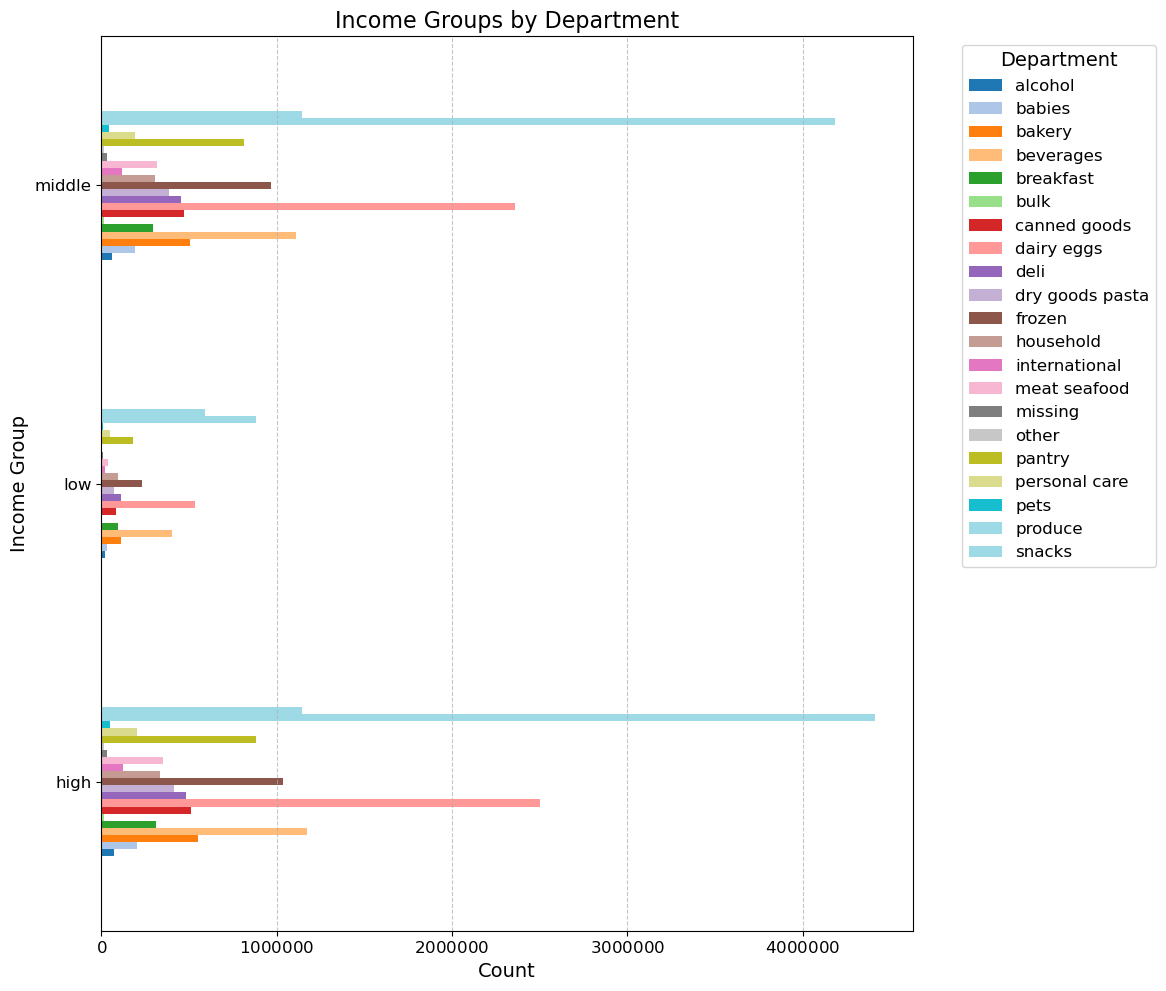

In [179]:
# Create chart:
plt.figure(figsize=(25, 25))
income_group_department_comparison_bar = income_group_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Income Groups by Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Income Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

income_group_department_comparison_bar.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
income_group_department_comparison_bar.ticklabel_format(style='plain', axis='x')

plt.show()

In [180]:
# Exporting Income Groups By Department Comparison Bar Chart
income_group_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_group_department_comparison_bar.png'))

## 08.2.3 Profile of department sales by region

In [181]:
# Creating crosstab to compare regions with departments
region_department_comparison=pd.crosstab(instacart_merged_dep['region'],instacart_merged_dep['department'],dropna=False)

<Figure size 2000x2500 with 0 Axes>

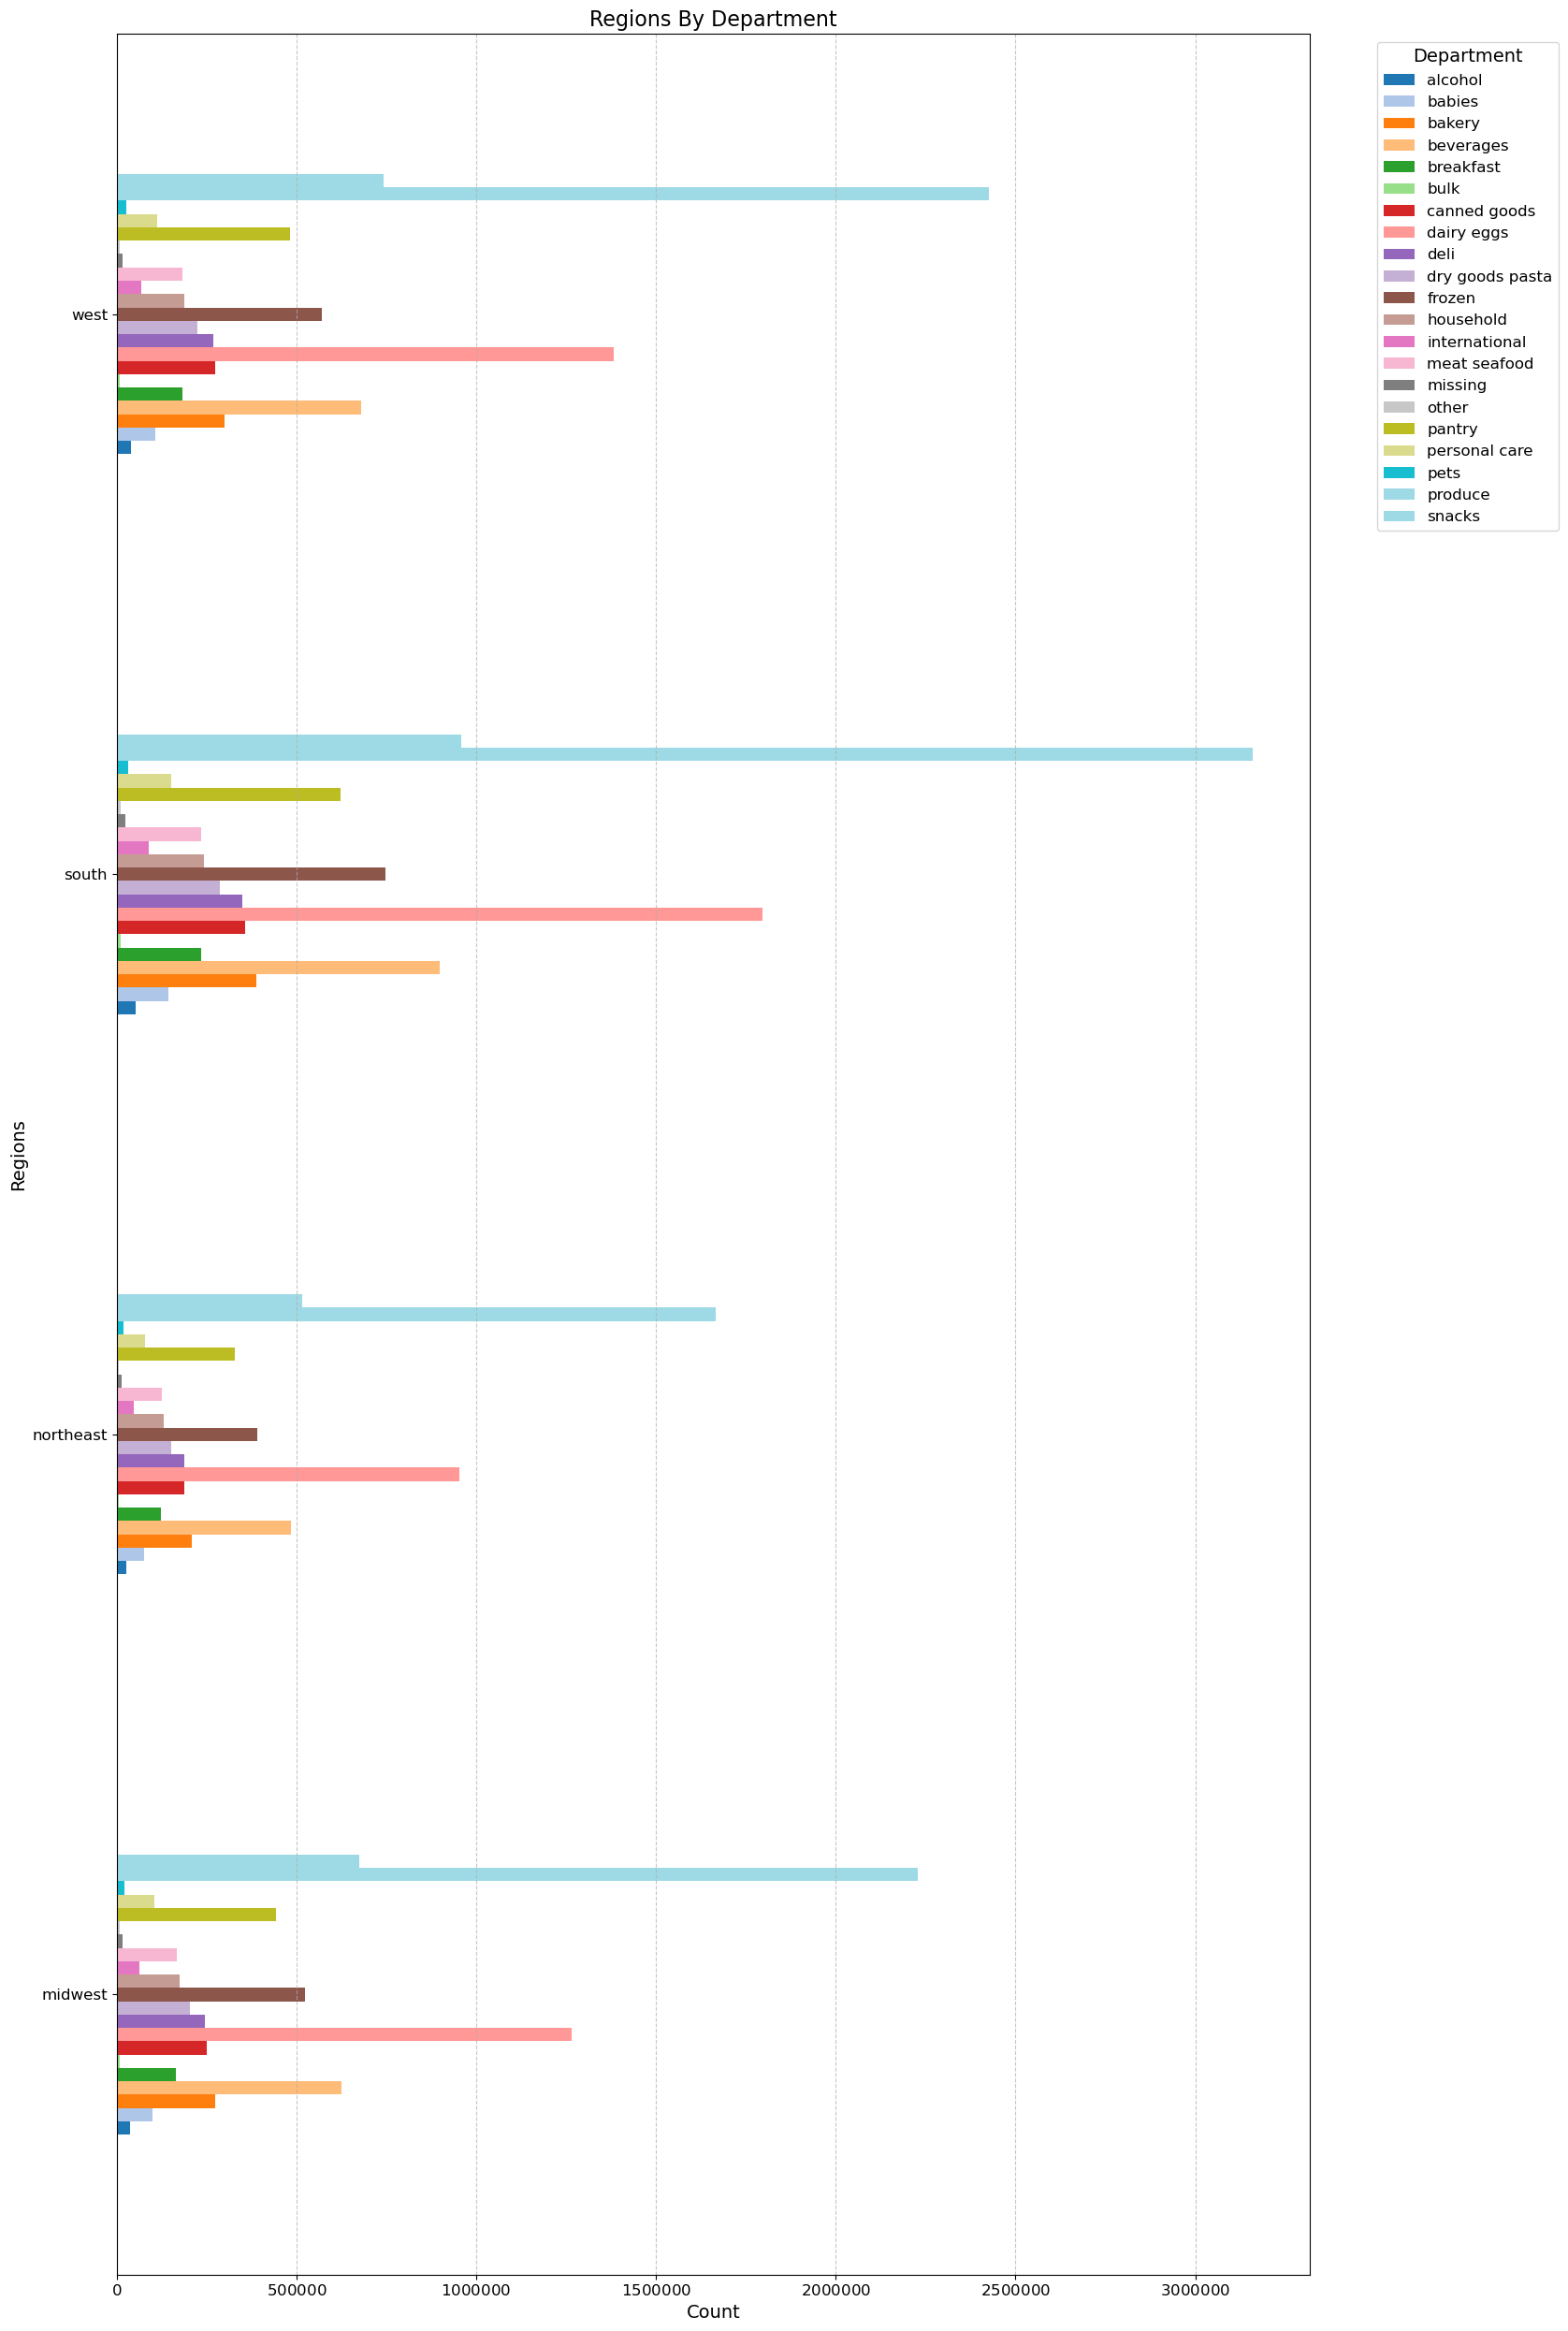

In [182]:
plt.figure(figsize=(20, 25))
region_department_comparison_bar = region_department_comparison.plot(kind='barh', figsize=(20, 25), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Regions By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Regions', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

region_department_comparison_bar.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
region_department_comparison_bar.ticklabel_format(style='plain', axis='x')

plt.show()

In [183]:
# Exporting Regions by Department Bar Chart
region_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_department_comparison_bar.png'))

## 09. Additional analyses

## 09.1 Top 10 departments for Instacart

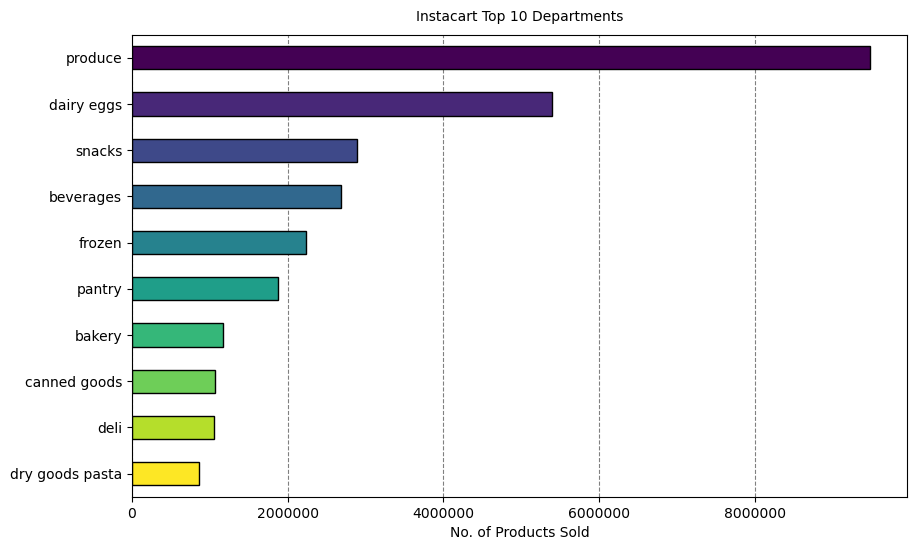

In [186]:
colors = plt.cm.viridis(np.linspace(0, 1, 10)) # Sets colour palette

fig, ax = plt.subplots(figsize = (10, 6))
plt.ticklabel_format(style='plain')

instacart_merged_dep['department'].value_counts().sort_values(ascending = False).head(10).plot.barh(color = colors, zorder = 2, edgecolor = 'black')
plt.title('Instacart Top 10 Departments', size=10, pad=10)
plt.xlabel('No. of Products Sold', )
plt.ylabel('')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
ax.invert_yaxis()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Instacart_department_sales.png'), bbox_inches = 'tight')

## 09.2 Ordering trends based on loyalty status

In [187]:
# Compute average order_total
loyalty_order_total = orders_subset.groupby('loyalty_flag')['order_total'].mean().sort_values(ascending = False).reset_index()

In [188]:
# Validate data
loyalty_order_total

,loyalty_flag,order_total
0,Regular customer,79.704470
1,Loyal customer,78.020985
2,New customer,76.449010


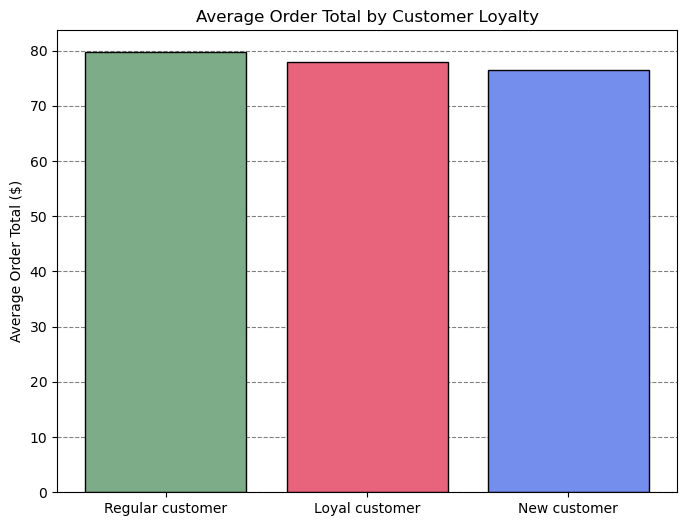

In [189]:
# Create bar chart based on loyalty status
plt.figure(figsize=(8, 6))         # Set up formatting and colours
colors = ['#7dad88', '#e8647c', '#748eed']

# Plot bars
bars = plt.bar(loyalty_order_total['loyalty_flag'], loyalty_order_total['order_total'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Order Total by Customer Loyalty")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_by_loyalty.png'), bbox_inches = 'tight')

In [190]:
# Average price of products purchased
product_avg_cost = instacart_merged_dep.groupby('loyalty_flag')['prices'].mean().sort_values(ascending = False).reset_index()

In [191]:
# Validate data
product_avg_cost

,loyalty_flag,prices
0,New customer,7.801206
1,Regular customer,7.798262
2,Loyal customer,7.773575


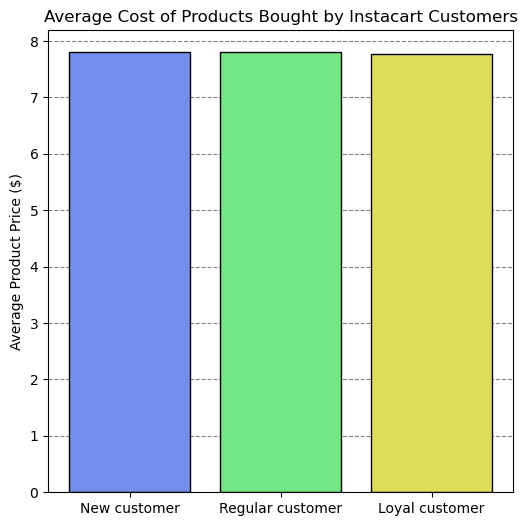

In [192]:
# Create bar chart of average cost per loyalty group
plt.figure(figsize=(6, 6))   # Set up formatting and colours
colors = ['#748eed', '#72e885', '#dcde5b']

# Plot bars
bars = plt.bar(product_avg_cost['loyalty_flag'], product_avg_cost['prices'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Cost of Products Bought by Instacart Customers")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Product Price ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_product_price_by_loyalty.png'), bbox_inches = 'tight')

## 09.3 Total orders by region

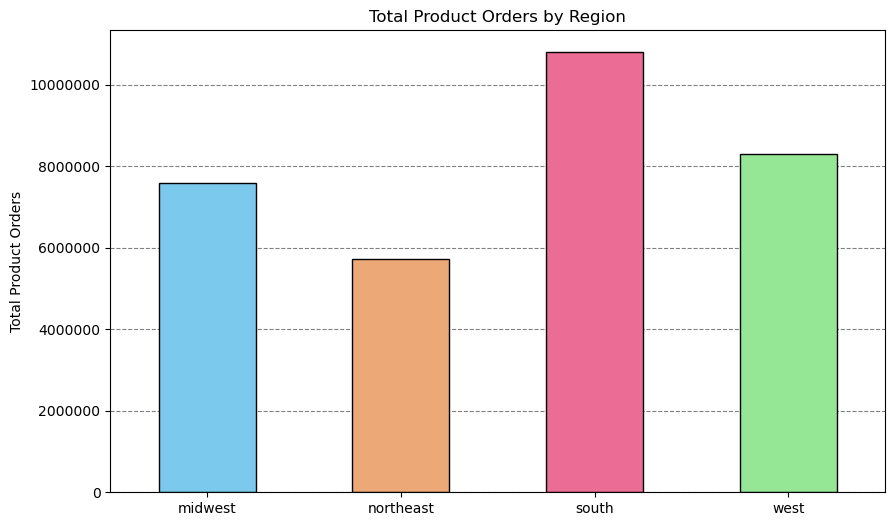

In [193]:
# Set up formatting
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')

# Plot bars
instacart_merged_dep['region'].value_counts().sort_index().plot.bar(color = ['#7bcaed', '#eda877', '#eb6c94', '#95e695'],edgecolor='black', zorder=2, alpha = 1)
plt.title("Total Product Orders by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Total Product Orders")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_total_orders_by_region.png'), bbox_inches = 'tight')

## 09.4 Average order total per region

In [194]:
# Average order_total
region_avg_order_total = orders_subset.groupby('region')['order_total'].mean().sort_values(ascending = False).reset_index()

In [195]:
# Validate data
region_avg_order_total

,region,order_total
0,west,78.612909
1,northeast,78.513909
2,south,78.490942
3,midwest,78.476653


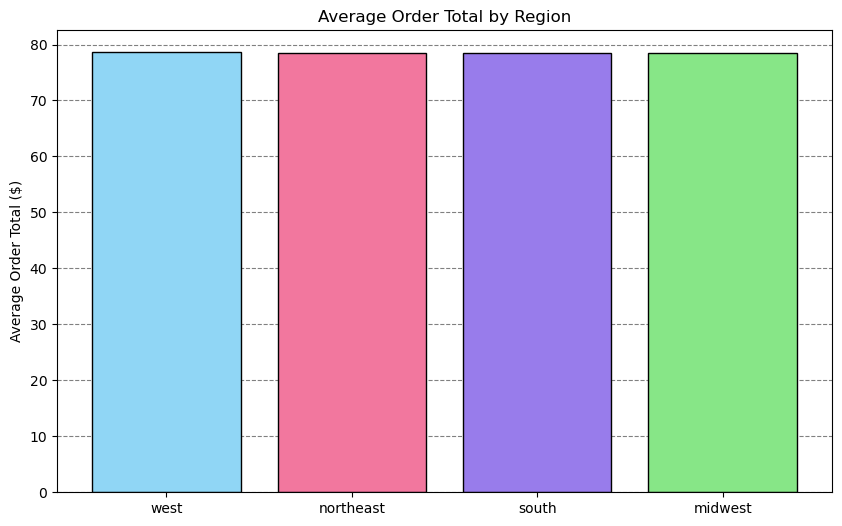

In [196]:
# Create bar chart of average order total by region
plt.figure(figsize=(10, 6))

# Plot bars
bars = plt.bar(region_avg_order_total['region'], region_avg_order_total['order_total'], color = ['#90d6f5', '#f2779e', '#987ceb', '#87e687'],edgecolor='black', zorder=2, alpha = 1)
plt.title("Average Order Total by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_by_region.png'), bbox_inches = 'tight')

## 09.5 Difference in ordering habits of different customer profiles

In [197]:
# Income groups by the mean of the order_total - multilevel index
sorted_df = income_cat_agg.sort_values(by=('order_total', 'mean'), ascending=False)

In [198]:
# Validate data
sorted_df

order_total                   
                     min       mean     max
income_group                               
high                 0.0  83.816501  1092.2
middle               0.0  81.883711   852.5
low                  1.0  52.428993   875.0

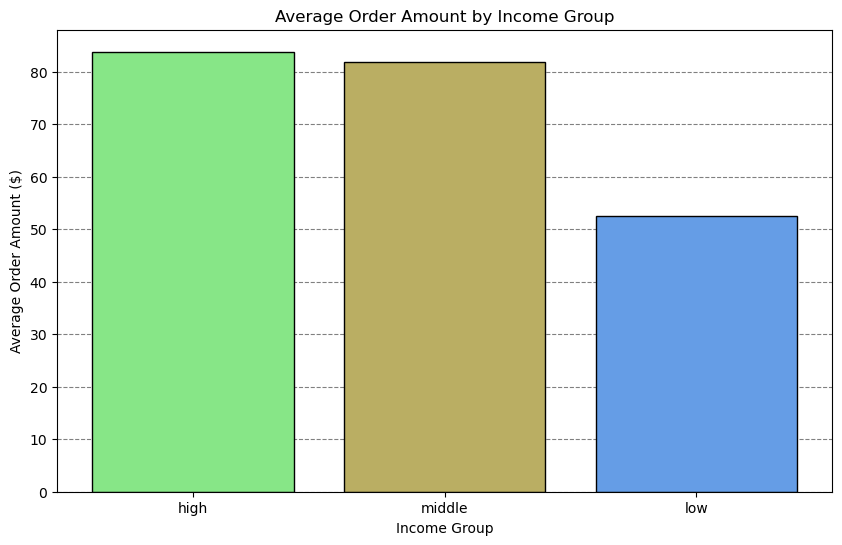

In [199]:
# Make bar chart for average order total
plt.figure(figsize=(10, 6))
plt.bar(sorted_df.index, sorted_df['order_total', 'mean'], color=['#87e687', '#baae63', '#659de6'], zorder=2, edgecolor='black')
plt.xlabel('Income Group')
plt.ylabel('Average Order Amount ($)')
plt.title('Average Order Amount by Income Group')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_amount_by_income.png'), bbox_inches = 'tight')

## 09.6 Product Prices and Pricing Categories

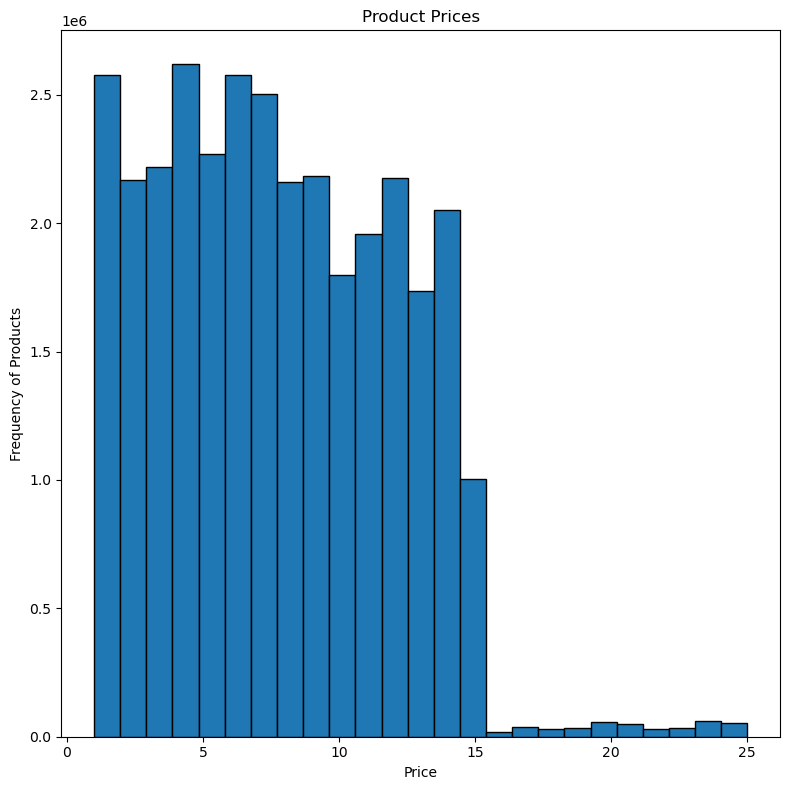

In [200]:
# Histogram of product prices
plt.figure(figsize=(8, 8))
prod_price_hist=instacart_merged_dep['prices'].plot.hist(bins=25,edgecolor='black')
plt.title('Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency of Products')
plt.tight_layout()
plt.show()

In [201]:
# Exporting Product Pricing Histogram
prod_price_hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prod_price_hist.png'), bbox_inches='tight')

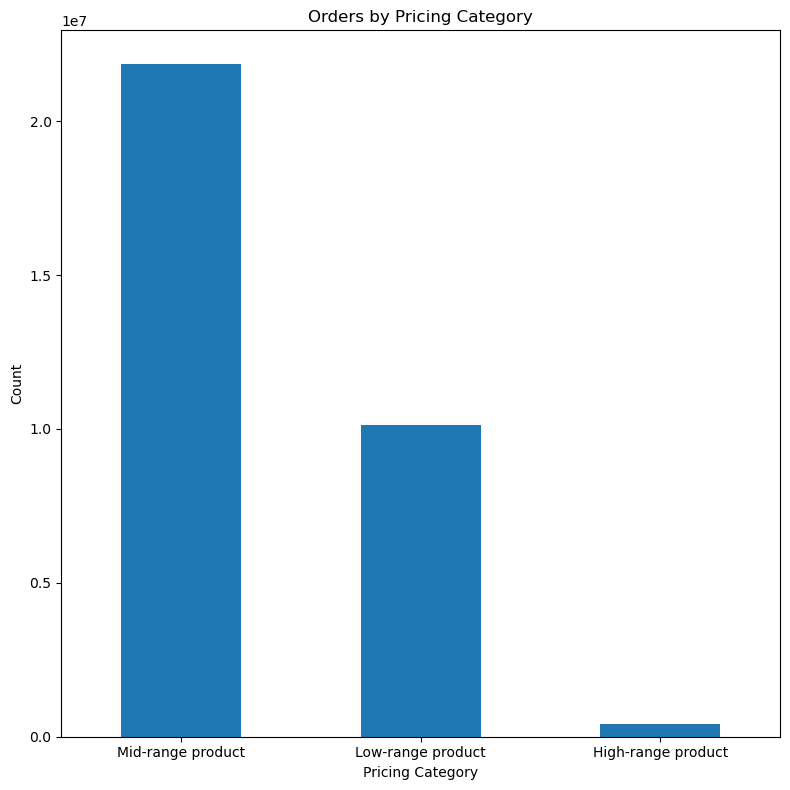

In [202]:
# Creating bar chart for price category
plt.figure(figsize=(8,8))
price_category_bar= instacart_merged_dep['price_range_loc'].value_counts().plot(kind='bar', rot=0)
plt.title('Orders by Pricing Category')
plt.xlabel('Pricing Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [203]:
# Exporting Pricing Category Bar Chart comparison
price_category_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','price_category_bar.png'), bbox_inches='tight')

## 09.7 customer loyalty Comparison

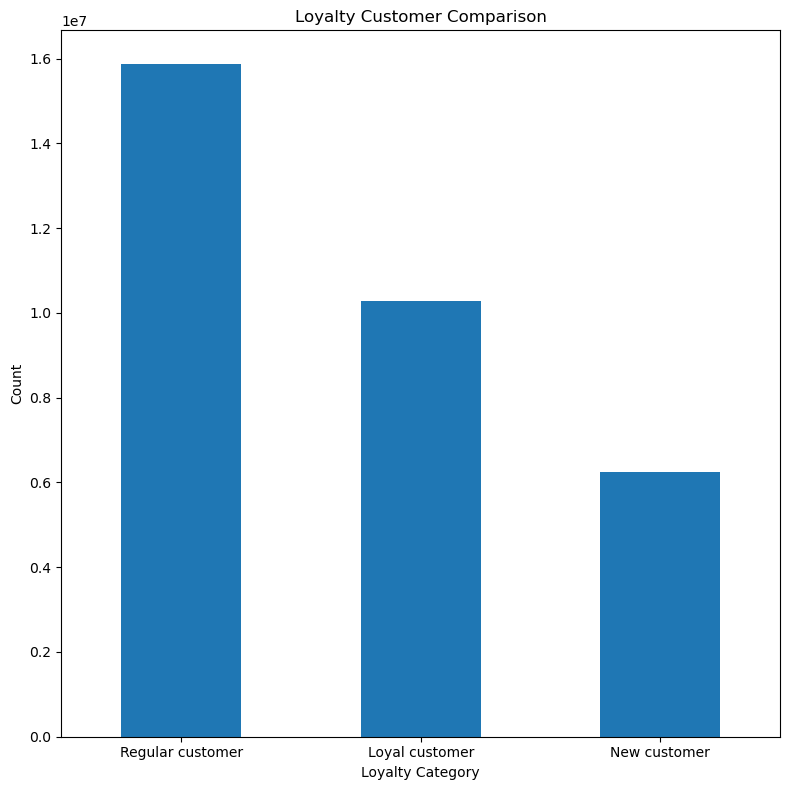

In [204]:
# Creating bar chart for customer loyalty breakdown
plt.figure(figsize=(8,8))
loyalty_customer_comparison_bar= instacart_merged_dep['loyalty_flag'].value_counts().plot(kind='bar', rot=0)
plt.title('Loyalty Customer Comparison')
plt.xlabel('Loyalty Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [205]:
# Exporting Loyalty Customer Comparison Bar Chart
loyalty_customer_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_customer_comparison_bar.png'), bbox_inches='tight')

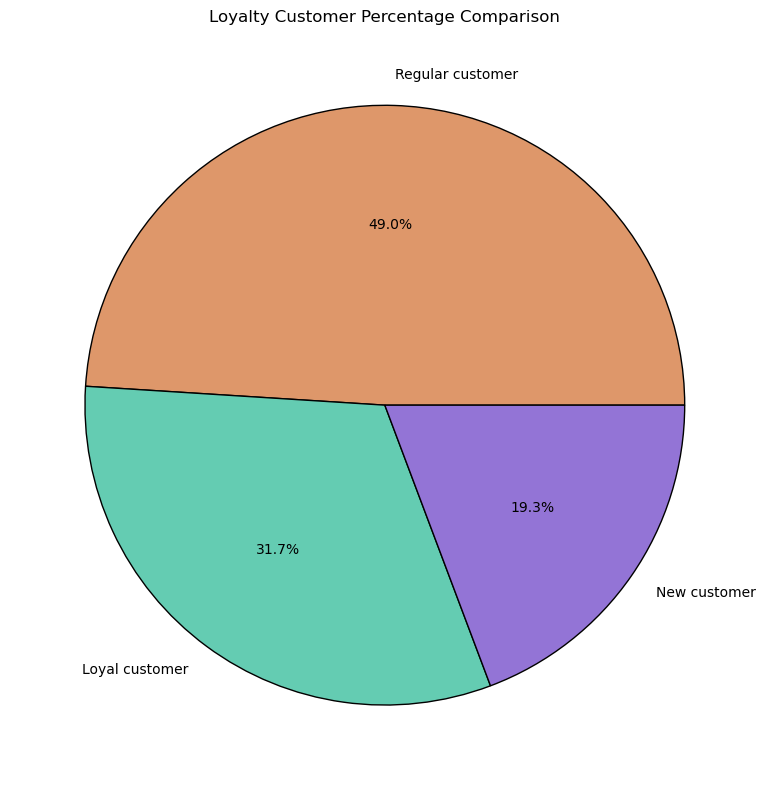

In [206]:
# Creating Pie Chart of customer loyalty breakdown
loyalty_customer_pie= instacart_merged_dep['loyalty_flag'].value_counts()
plt.figure(figsize=(8,8))
loyalty_customer_comparison_pie=loyalty_customer_pie.plot.pie(autopct='%.1f%%',wedgeprops={'edgecolor':'black'}, colors = ['#de976a','#64ccb2','#9374d6'])
plt.title('Loyalty Customer Percentage Comparison')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [207]:
loyalty_customer_comparison_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_customer_comparison_pie.png'), bbox_inches='tight')

In [208]:
instacart_merged_dep.head(1)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag,age_group,income_group,dependants_flag,department,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,midwest,include,senior,low,has_dependants,snacks,both


## 09.8 customer marital status breakdown

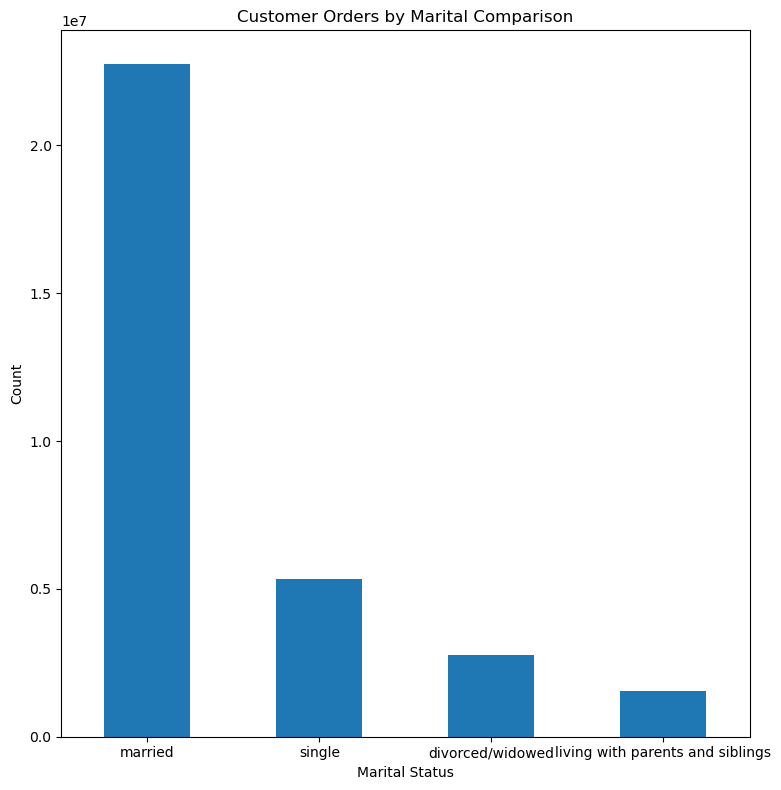

In [209]:
# Creating bar chart for customer marital status breakdown
plt.figure(figsize=(8,8))
marital_status_comparison_bar= instacart_merged_dep['fam_status'].value_counts().plot(kind='bar', rot=0)
plt.title('Customer Orders by Marital Comparison')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [210]:
# Export bar chart of customer marital status orders
marital_status_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','marital_status_comparison_bar.png'), bbox_inches='tight')

## 09.9 age by num_of_dependants comparison

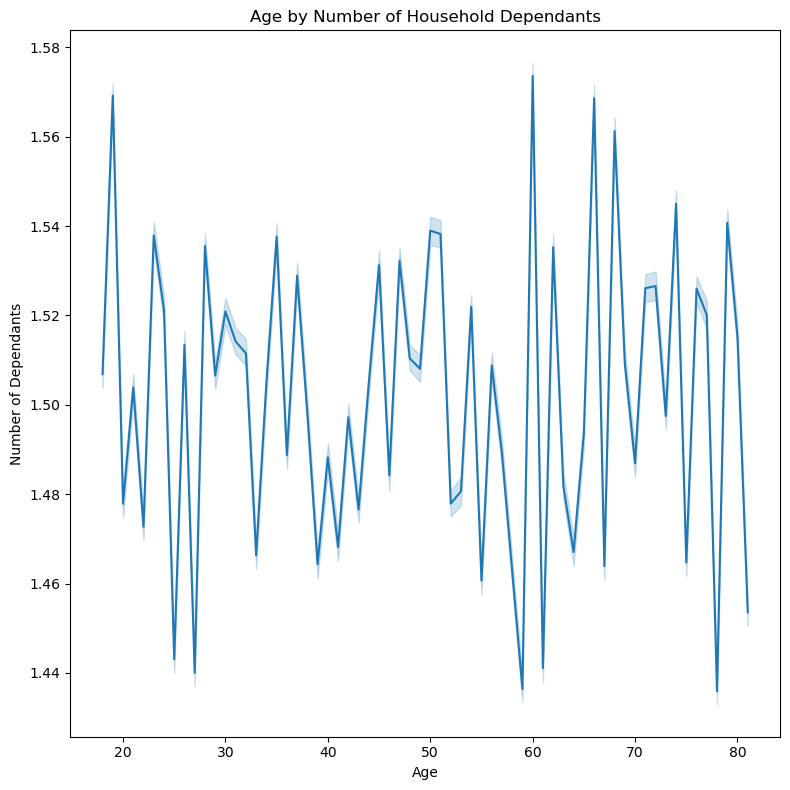

In [211]:
# Creating Line Chart age by num_of_dependants comparison
plt.figure(figsize=(8, 8))
age_by_dependants_line=sns.lineplot(data=instacart_merged_dep,x='age',y='n_dependants')
plt.title('Age by Number of Household Dependants')
plt.xlabel('Age')
plt.ylabel('Number of Dependants')
plt.tight_layout()
plt.show()

In [212]:
# Exporting line chart age by num_of_dependants comparison
age_by_dependants_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_by_dependants_line.png'), bbox_inches='tight')

In [213]:
# Creating crosstab to compare age_group profile with customer frequency type
age_customer_frequency_comparison=pd.crosstab(instacart_merged_dep['age_group'],instacart_merged_dep['order_frequency'])

## 09.10 age_group By customer frequency Comparison

<Figure size 1000x700 with 0 Axes>

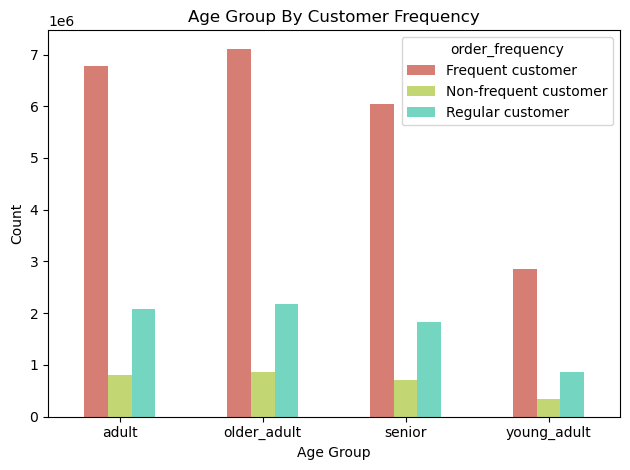

In [214]:
# Creating Bar Chart for age_group By customer frequency Comparison
plt.figure(figsize=(10, 7))
age_customer_frequency_comparison_bar= age_customer_frequency_comparison.plot(kind='bar', rot=0, color = ['#d67e74', '#c2d674', '#74d6c1'])
plt.title('Age Group By Customer Frequency')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [215]:
# Exporting Age Group By Customer Frequency Bar Chart
age_customer_frequency_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_customer_frequency_comparison_bar.png'), bbox_inches='tight')

In [216]:
# Creating Crosstab Bewtween age_group and loyalty_flag
age_group_loyalty_comparison=pd.crosstab(instacart_merged_dep['age_group'],instacart_merged_dep['loyalty_flag'],dropna=False)

## 09.11 age_group By customer loyalty

<Figure size 2000x2000 with 0 Axes>

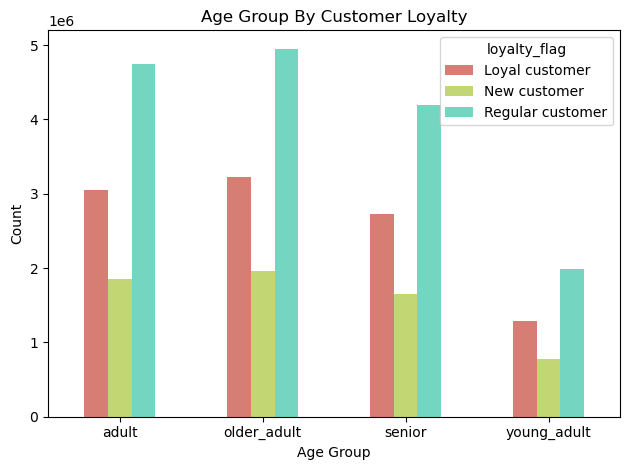

In [217]:
# Creating Bar Chart for age_group By customer loyalty
plt.figure(figsize=(20, 20))
age_group_loaylty_comparison_bar= age_group_loyalty_comparison.plot(kind='bar', rot=0, color = ['#d67e74', '#c2d674', '#74d6c1'])
plt.title('Age Group By Customer Loyalty')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [218]:
# Exporting age group by customer loyalty chart
age_group_loaylty_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_loaylty_comparison_bar.png'), bbox_inches='tight')

In [219]:
# Creating crosstab to compare loyalty_flag with type_of_spender
loyalty_type_of_spender_comparison=pd.crosstab(instacart_merged_dep['loyalty_flag'],instacart_merged_dep['spending_flag'],dropna=False)

## 09.12 Loyalty spending By type of spender

<Figure size 0x0 with 0 Axes>

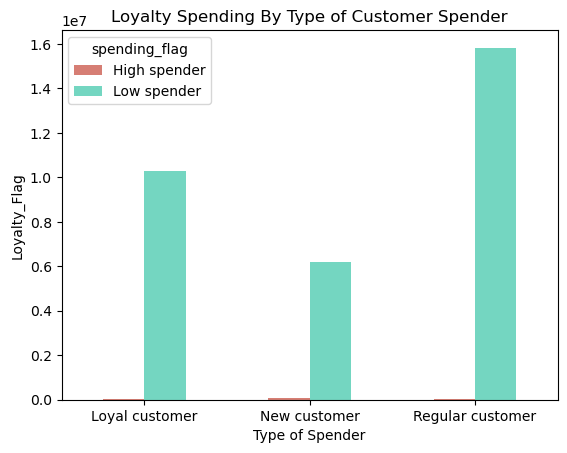

In [220]:
# Creating Bar Chart for Loyalty spending By type of spender
plt.figure(figsize=(0, 0))
loyalty_type_of_spender_comparison_bar= loyalty_type_of_spender_comparison.plot(kind='bar', rot=0, color = ['#d67e74', '#74d6c1'])
plt.title('Loyalty Spending By Type of Customer Spender')
plt.xlabel('Type of Spender')
plt.ylabel('Loyalty_Flag')
plt.show()

In [221]:
# Exporting Loyalty spending By type of spender chart
loyalty_type_of_spender_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_type_of_spender_comparison_bar.png'), bbox_inches='tight')